### Carregar os dados


In [1]:
focoDias = 100
focoPeso = 85

import pandas as pd
import numpy as np

def LerJSON(data):
    import json
    if (data == ''):
        return json.loads('[]')
    else:
        return json.loads(data)

df_dados = pd.read_csv('./dados.csv', quotechar='\'', converters={'AtividadeFisica':LerJSON, 'AlimentacaoTipo':LerJSON}, header=0)

Cálculo do limite de peso

In [2]:
count = df_dados['Peso'].count()
max = df_dados['Peso'].max()
df_dados['Peso'] = df_dados['Peso'].interpolate()

linha_limite = pd.Series(range(0, focoDias))
linha_limite = max - (linha_limite * ((max - focoPeso) / focoDias))
df_dados['Limite'] = linha_limite

Nível de atividades físicas

In [3]:
def scoreAtividade(data):
    score = 0
    for atividade in data:
        score = score + {
            'Corrida': lambda: atividade['Distancia'] * atividade['Velocidade'],
            'Caminhada': lambda: atividade['Distancia'] * atividade['Velocidade'] * 0.5,
            'Funcional': lambda: 30,
            'Musculação': lambda: 15,
        }.get(atividade['Tipo'], lambda: 0)()        
    return score

df_dados['ScoreAtividade'] = df_dados['AtividadeFisica'].apply(scoreAtividade)
df_dados['ScoreAtividade'] = 15 * df_dados['ScoreAtividade']

def tipoAtividade(data):
    tipo = 0
    for atividade in data:
        tipo = tipo + {
            'Corrida': lambda: 1,
            'Musculação': lambda: 2,
            'Funcional': lambda: 4
        }.get(atividade['Tipo'], lambda: 0)()        
    return tipo

df_dados['Tipo'] = df_dados['AtividadeFisica'].apply(tipoAtividade)

Nível de alimentação

In [4]:
def tipoAlimentacao(data):
    tipo = 0        
    for alimentacao in data:
        tipo = tipo + {
            'Raízes': lambda: 1,
            'Legumes': lambda: 2,
            'Frutas': lambda: 4,
            'Laticínios': lambda: 8,
            'Farinários': lambda: 16,
            'Proteína Animal': lambda: 32,
            'Açúcar': lambda: 64
        }.get(alimentacao, lambda: 0)()
    return tipo

def nivelAlimentacao(data):
    return {
        'Baixa': lambda: 1,
        'Moderada': lambda: 2,
        'Alta': lambda: 4,
        'Exagerada': lambda: 8,
    }.get(data, lambda: 0)()

alimentacaoTipo = df_dados['AlimentacaoTipo'].apply(tipoAlimentacao)
alimentacaoVolume = df_dados['AlimentacaoNivel'].apply(nivelAlimentacao)
df_dados["ScoreAlimentacao"] = 0.025 * np.sqrt(alimentacaoTipo * alimentacaoVolume)

Número de dias

In [5]:
df_dados["NumeroDias"] = df_dados.index + 1

Geração do gráfico

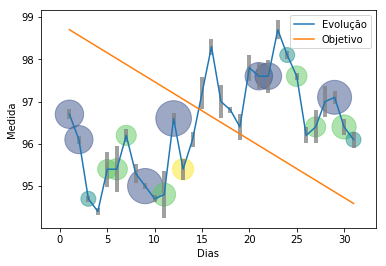

In [7]:
import matplotlib.pyplot as plt

plt.plot(df_dados["NumeroDias"], df_dados["Peso"])
plt.plot(df_dados["NumeroDias"], df_dados["Limite"])
plt.scatter(df_dados["NumeroDias"], df_dados["Peso"], s=df_dados["ScoreAtividade"], c=df_dados["Tipo"], alpha=0.5)
plt.errorbar(df_dados["NumeroDias"], df_dados["Peso"], yerr=df_dados['ScoreAlimentacao'], ecolor="grey", elinewidth=4, alpha=0.75, fmt='none')

plt.xlabel("Dias")
plt.ylabel("Medida")
plt.legend(['Evolução', 'Objetivo'])

plt.savefig('evolution.png', dpi=300)
plt.show()

Visualização da Tabela

In [9]:
tabela = df_dados[['Data', 'NumeroDias', 'Peso', 'Limite', 'ScoreAtividade', 'ScoreAlimentacao', 'AlimentacaoCondicao']]
tabela.to_csv('dadosOrganizados.csv')
tabela

,Data,NumeroDias,Peso,Limite,ScoreAtividade,ScoreAlimentacao,AlimentacaoCondicao
0,2018-09-23,1,96.7,98.700,807.984,0.122474,NaN
1,2018-09-24,2,96.1,98.563,793.800,0.093541,NaN
2,2018-09-25,3,94.7,98.426,225.000,0.066144,NaN
3,2018-09-26,4,94.4,98.289,0.000,0.079057,NaN
4,2018-09-27,5,95.4,98.152,375.000,0.415331,NaN
5,2018-09-28,6,95.4,98.015,450.000,0.540833,NaN
6,2018-09-29,7,96.2,97.878,405.000,0.158114,NaN
7,2018-09-30,8,95.3,97.741,0.000,0.223607,NaN
8,2018-10-01,9,95.0,97.604,1242.486,0.079057,NaN
9,2018-10-02,10,94.7,97.467,0.000,0.079057,NaN
